In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('berries.png')
gi = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ei= cv2.equalizeHist(gi)
#x, y, w, h = 100, 100, 200, 200 # worked
x=int(input("Enter x:"))
y=int(input("Enter y:"))
w=int(input("Enter w"))
h=int(input("Enter h:"))
roi = ei[y:y+h, x:x+w]
equalized_roi = cv2.equalizeHist(roi)
ei[y:y+h, x:x+w] = equalized_roi
cv2.imshow('Original Image', gi)
cv2.imshow('Enhanced Image', ei)
cv2.waitKey(0)
cv2.destroyAllWindows()





In [21]:
import cv2
import numpy as np
image= np.random.randint(0, 256, (5, 5), dtype=np.uint8)
binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)
print("Original Image:")
print(image)
print("\nBinary Image:")
print(binary_image)





Original Image:
[[ 45  89  28 164  69]
 [  6 234 205 240 165]
 [ 12  13  11 146  60]
 [  7 227  72  93 203]
 [252  12  24 157 163]]

Binary Image:
(127.0, array([[0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 1, 1]], dtype=uint8))


Point: (169, 250)
Neighbors: [(168, 249), (168, 250), (168, 251), (169, 249), (169, 251), (170, 249), (170, 250), (170, 251)]
Diagonal Neighbors: [(168, 249), (168, 251), (170, 249), (170, 251)]

Point: (211, 175)
Neighbors: [(210, 174), (210, 175), (210, 176), (211, 174), (211, 176), (212, 174), (212, 175), (212, 176)]
Diagonal Neighbors: [(210, 174), (210, 176), (212, 174), (212, 176)]

Point: (130, 136)
Neighbors: [(129, 135), (129, 136), (129, 137), (130, 135), (130, 137), (131, 135), (131, 136), (131, 137)]
Diagonal Neighbors: [(129, 135), (129, 137), (131, 135), (131, 137)]

Point: (193, 161)
Neighbors: [(192, 160), (192, 161), (192, 162), (193, 160), (193, 162), (194, 160), (194, 161), (194, 162)]
Diagonal Neighbors: [(192, 160), (192, 162), (194, 160), (194, 162)]

Point: (103, 137)
Neighbors: [(102, 136), (102, 137), (102, 138), (103, 136), (103, 138), (104, 136), (104, 137), (104, 138)]
Diagonal Neighbors: [(102, 136), (102, 138), (104, 136), (104, 138)]



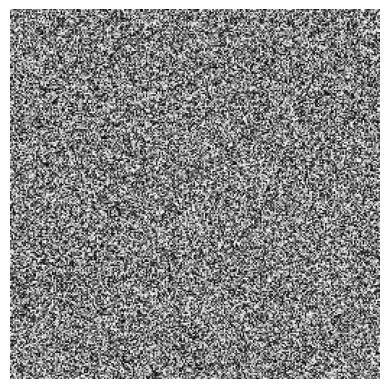

In [20]:
import numpy as np
import matplotlib.pyplot as plt
image_size = 256
gray_image = np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)
def find_neighbors(point):
    x, y = point
    neighbors = []
    diagonal_neighbors = []
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            if dx == 0 and dy == 0:
                continue
            neighbor_x, neighbor_y = x + dx, y + dy
            if 0 <= neighbor_x < image_size and 0 <= neighbor_y < image_size:
                neighbors.append((neighbor_x, neighbor_y))
                if dx != 0 and dy != 0:
                    diagonal_neighbors.append((neighbor_x, neighbor_y))
    return neighbors, diagonal_neighbors
points = [(np.random.randint(0, image_size), np.random.randint(0, image_size)) for _ in range(5)]

for point in points:
    neighbors, diagonal_neighbors = find_neighbors(point)
    print(f"Point: {point}")
    print(f"Neighbors: {neighbors}")
    print(f"Diagonal Neighbors: {diagonal_neighbors}")
    print()
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


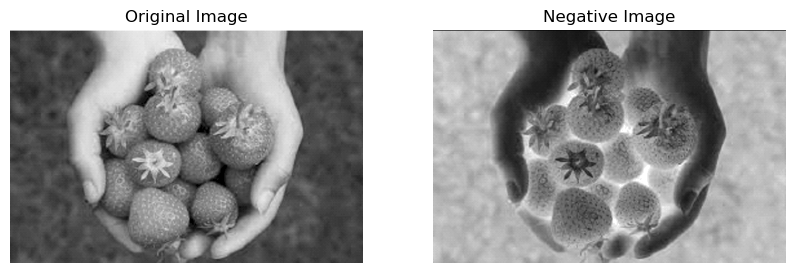

In [39]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('berries.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found")
else:
    negative_image = 255 - image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Image')
    plt.axis('off')

    plt.show()


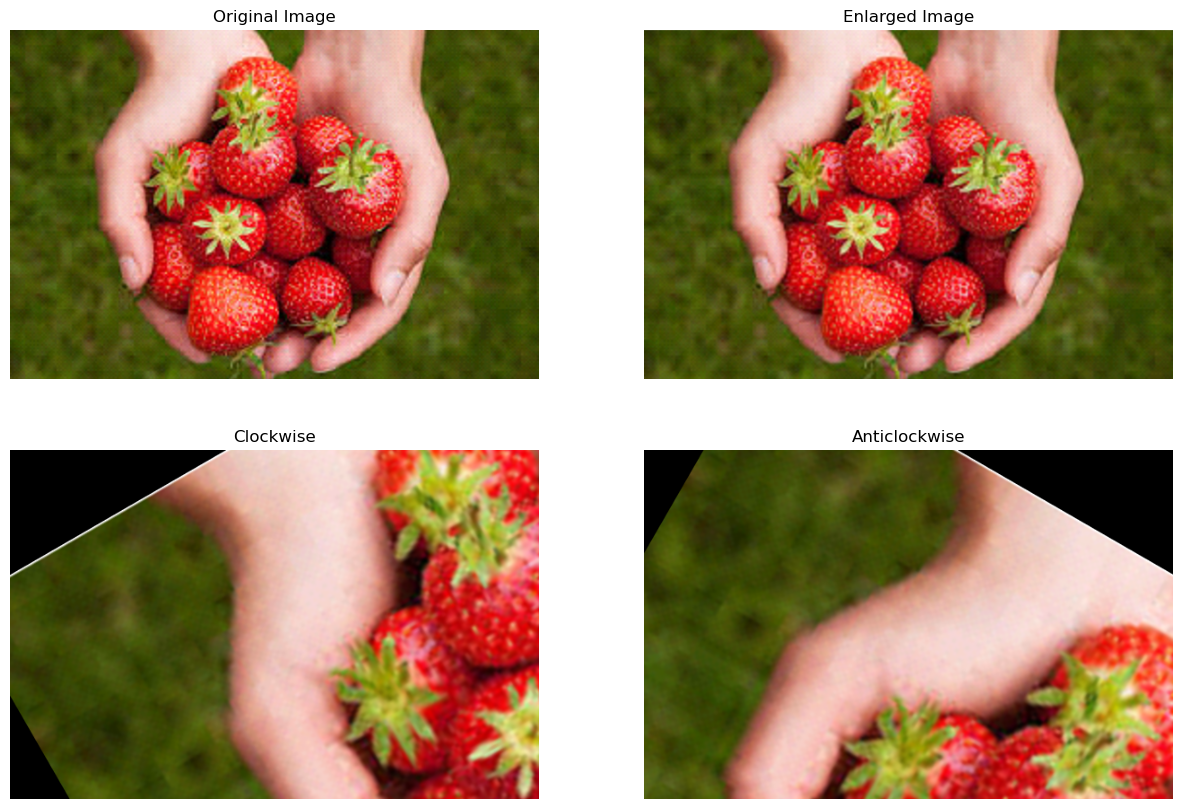

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('berries.png')
enlarged_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
height, width = image.shape[:2]
center = (width / 2, height / 2)
angle = 30 
rotation_matrix_clockwise = cv2.getRotationMatrix2D(center, angle, 1)
rotation_matrix_counterclockwise = cv2.getRotationMatrix2D(center, -angle, 1)
rotated_image_clockwise = cv2.warpAffine(enlarged_image, rotation_matrix_clockwise, (width, height))
rotated_image_counterclockwise = cv2.warpAffine(enlarged_image, rotation_matrix_counterclockwise, (width, height))
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2RGB))
plt.title('Enlarged Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(rotated_image_clockwise, cv2.COLOR_BGR2RGB))
plt.title('Clockwise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rotated_image_counterclockwise, cv2.COLOR_BGR2RGB))
plt.title('Anticlockwise')
plt.axis('off')

plt.show()




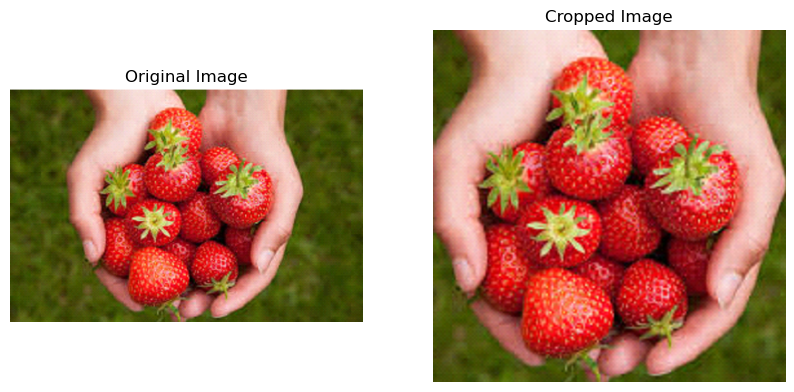

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('berries.png')
height, width, _ = image.shape
if height > width:
    diff = (height - width) // 2
    ci = image[diff:diff+width, :]
else:
    diff = (width - height) // 2
    ci = image[:, diff:diff+height]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ci, cv2.COLOR_BGR2RGB))
plt.title('Squared_crop')
plt.axis('off')
plt.show()
cv2.imwrite('cropped_image.jpg', ci)


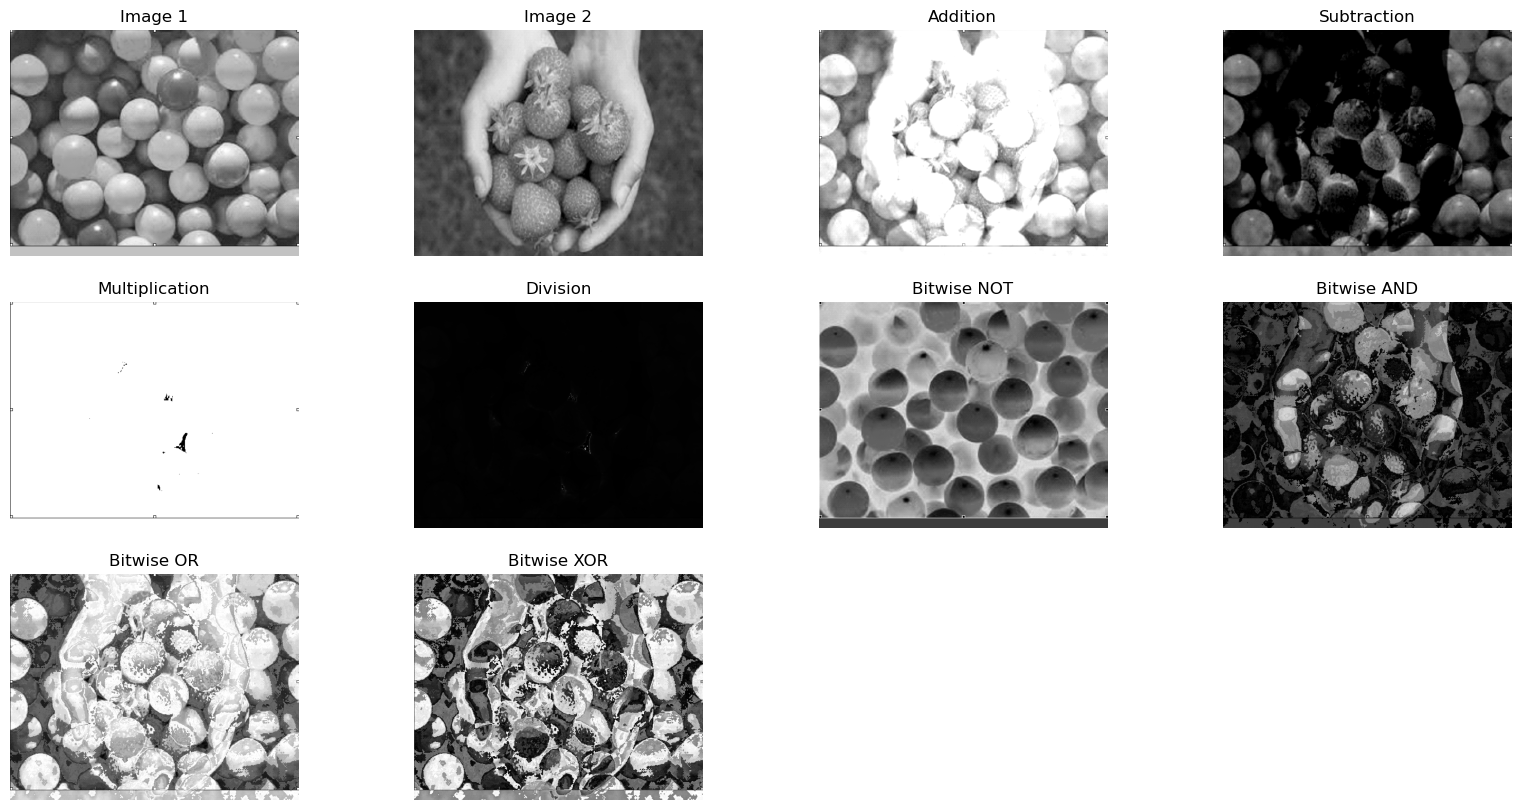

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image1 = cv2.imread('ballons.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('berries.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
add_result = cv2.add(image1, image2)
sub_result = cv2.subtract(image1, image2)
mul_result = cv2.multiply(image1, image2, scale=1.0)
div_result = cv2.divide(image1, image2, scale=1.0)
bitwise_not_result = cv2.bitwise_not(image1)
bitwise_and_result = cv2.bitwise_and(image1, image2)
bitwise_or_result = cv2.bitwise_or(image1, image2)
bitwise_xor_result = cv2.bitwise_xor(image1, image2)
plt.figure(figsize=(20, 10))
plt.subplot(3, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')
plt.subplot(3, 4, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')
plt.subplot(3, 4, 3)
plt.imshow(add_result, cmap='gray')
plt.title('Addition')
plt.axis('off')
plt.subplot(3, 4, 4)
plt.imshow(sub_result, cmap='gray')
plt.title('Subtraction')
plt.axis('off')
plt.subplot(3, 4, 5)
plt.imshow(mul_result, cmap='gray')
plt.title('Multiplication')
plt.axis('off')
plt.subplot(3, 4, 6)
plt.imshow(div_result, cmap='gray')
plt.title('Division')
plt.axis('off')
plt.subplot(3, 4, 7)
plt.imshow(bitwise_not_result, cmap='gray')
plt.title('Bitwise NOT')
plt.axis('off')
plt.subplot(3, 4, 8)
plt.imshow(bitwise_and_result, cmap='gray')
plt.title('Bitwise AND')
plt.axis('off')
plt.subplot(3, 4, 9)
plt.imshow(bitwise_or_result, cmap='gray')
plt.title('Bitwise OR')
plt.axis('off')
plt.subplot(3, 4, 10)
plt.imshow(bitwise_xor_result, cmap='gray')
plt.title('Bitwise XOR')
plt.axis('off')
plt.show()
